<a href="https://colab.research.google.com/github/Karan0322/Oil-price-prediction/blob/main/Oil_price_prediction_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
sns.set()
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Import the File 

In [ ]:
df=pd.read_csv("Crude_All.csv")

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/23/2000,31.950001,32.799999,31.950001,32.049999,32.049999,79385.0
1,8/24/2000,31.900000,32.240002,31.400000,31.629999,31.629999,72978.0
2,8/25/2000,31.700001,32.099998,31.320000,32.049999,32.049999,44601.0
3,8/28/2000,32.040001,32.919998,31.860001,32.869999,32.869999,46770.0
4,8/29/2000,32.820000,33.029999,32.560001,32.720001,32.720001,49131.0
...,...,...,...,...,...,...,...
5312,7/2/2021,75.019997,75.620003,74.410004,75.160004,75.160004,377531.0
5313,7/6/2021,75.349998,76.980003,72.940002,73.370003,73.370003,714044.0
5314,7/7/2021,73.849998,74.860001,71.070000,72.199997,72.199997,607971.0
5315,7/8/2021,72.169998,73.260002,70.760002,72.940002,72.940002,529690.0


In [ ]:
df=pd.read_csv("Crude_All.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/23/2000,31.950001,32.799999,31.950001,32.049999,32.049999,79385.0
1,8/24/2000,31.900000,32.240002,31.400000,31.629999,31.629999,72978.0
2,8/25/2000,31.700001,32.099998,31.320000,32.049999,32.049999,44601.0
3,8/28/2000,32.040001,32.919998,31.860001,32.869999,32.869999,46770.0
4,8/29/2000,32.820000,33.029999,32.560001,32.720001,32.720001,49131.0


In [ ]:
df.shape

(5317, 7)

In [ ]:
df=df.drop(axis=1,columns='Adj Close')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5317 entries, 0 to 5316
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5317 non-null   object 
 1   Open    5210 non-null   float64
 2   High    5210 non-null   float64
 3   Low     5210 non-null   float64
 4   Close   5210 non-null   float64
 5   Volume  5210 non-null   float64
dtypes: float64(5), object(1)
memory usage: 249.4+ KB


 Identify and Drop Null Values

In [ ]:
df.isnull().sum()

Date        0
Open      107
High      107
Low       107
Close     107
Volume    107
dtype: int64

In [ ]:
df[df['Close'].isnull()]

,Date,Open,High,Low,Close,Volume
8,9/4/2000,NaN,NaN,NaN,NaN,NaN
66,11/23/2000,NaN,NaN,NaN,NaN,NaN
67,11/24/2000,NaN,NaN,NaN,NaN,NaN
88,12/25/2000,NaN,NaN,NaN,NaN,NaN
93,1/1/2001,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
4808,7/3/2019,NaN,NaN,NaN,NaN,NaN
4912,11/29/2019,NaN,NaN,NaN,NaN,NaN
4929,12/24/2019,NaN,NaN,NaN,NaN,NaN
5163,11/27/2020,NaN,NaN,NaN,NaN,NaN


In [ ]:
df= df.dropna(how='any')#Drop the row contains null value

In [ ]:
df.shape

(5210, 6)

In [ ]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Analysis of graph for outlier

No handles with labels found to put in legend.


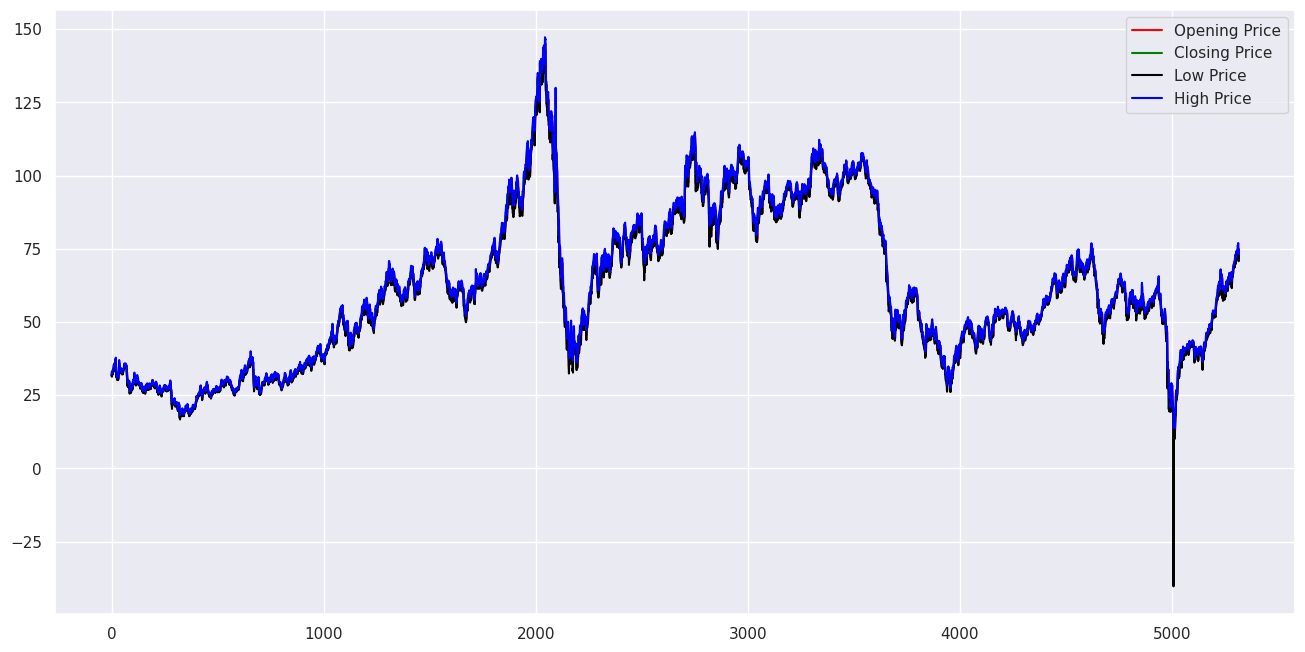

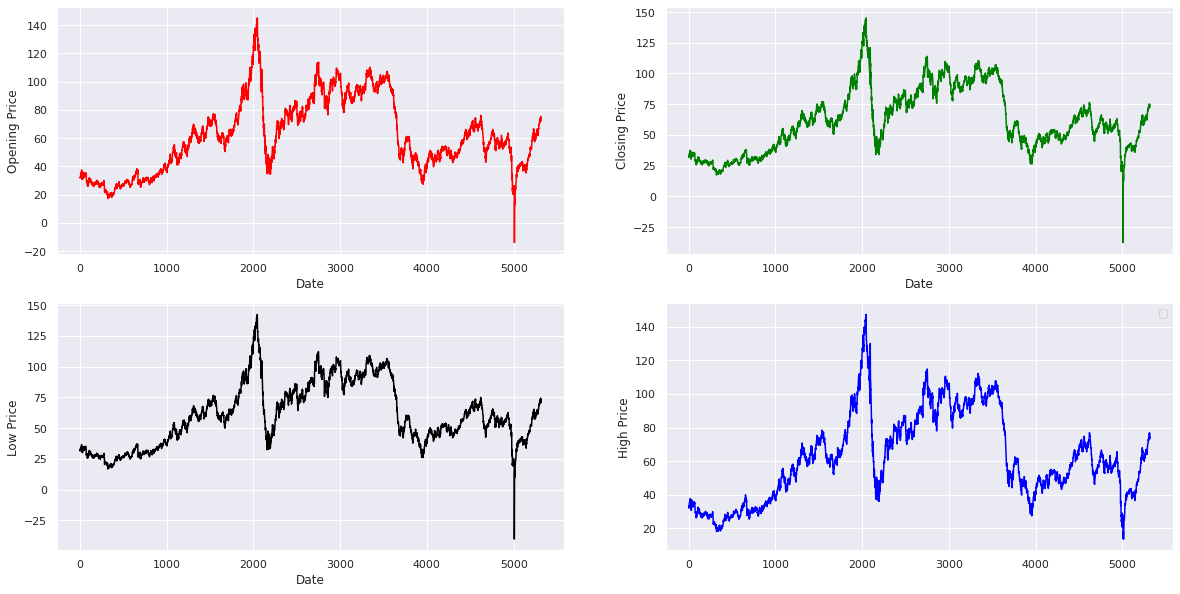

In [ ]:
plt.figure(figsize=(16,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(df['Open'], color='red', label = 'Opening Price')
plt.plot(df['Close'], color='green', label = 'Closing Price')
plt.plot(df['Low'], color='black', label = 'Low Price')
plt.plot(df['High'], color='blue', label = 'High Price')
plt.legend(loc='best')

plt.subplots(2, 2, figsize = (20, 10))

ax1 = plt.subplot(2, 2, 1)
plt.plot(df['Open'], color='red')
plt.xlabel('Date')
plt.ylabel('Opening Price')

ax2 = plt.subplot(2, 2, 2)
plt.plot(df['Close'], color='green')
plt.xlabel('Date')
plt.ylabel('Closing Price')

ax3 = plt.subplot(2, 2, 3)
plt.plot(df['Low'], color='black')
plt.xlabel('Date')
plt.ylabel('Low Price')

ax4 = plt.subplot(2, 2, 4)
plt.plot(df['High'], color='blue')

plt.ylabel('High Price')

plt.legend(loc='best')

In [ ]:
df['Close'].describe()

count    5210.000000
mean       61.809263
std        25.610364
min       -37.630001
25%        41.932500
50%        58.694999
75%        81.234999
max       145.179993
Name: Close, dtype: float64

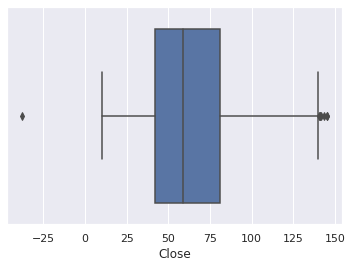

In [ ]:
sns.boxplot(x=df['Close'])
plt.show()

In [ ]:
df[df['Close']<0]

,Date,Open,High,Low,Close,Volume
5008,4/20/2020,17.73,17.85,-40.32,-37.630001,247947.0


In [ ]:
df[df['Open']<0]

,Date,Open,High,Low,Close,Volume
5009,4/21/2020,-14.0,13.86,-16.74,10.01,2288230.0


In [ ]:
df[df['High']<0]

,Date,Open,High,Low,Close,Volume


In [ ]:
df[df['Low']<0]

,Date,Open,High,Low,Close,Volume
5008,4/20/2020,17.73,17.85,-40.32,-37.630001,247947.0
5009,4/21/2020,-14.00,13.86,-16.74,10.010000,2288230.0


In [ ]:
df1=df.replace(-37.630001,5)

In [ ]:
df1[df1['Low']<0]

,Date,Open,High,Low,Close,Volume
5008,4/20/2020,17.73,17.85,-40.32,5.00,247947.0
5009,4/21/2020,-14.00,13.86,-16.74,10.01,2288230.0


In [ ]:
data=pd.read_csv('Crude_All.csv',parse_dates=[0])

In [ ]:
data= data.dropna(how='any')

In [ ]:
df2=data.replace(-37.630001,5)

**Resampling**

In [ ]:
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-23,31.950001,32.799999,31.950001,32.049999,32.049999,79385.0
1,2000-08-24,31.900000,32.240002,31.400000,31.629999,31.629999,72978.0
2,2000-08-25,31.700001,32.099998,31.320000,32.049999,32.049999,44601.0
3,2000-08-28,32.040001,32.919998,31.860001,32.869999,32.869999,46770.0
4,2000-08-29,32.820000,33.029999,32.560001,32.720001,32.720001,49131.0


In [ ]:
df2.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
monthly_mean_df=df2.resample('M',on='Date').mean()

In [ ]:
monthly_mean_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-31,32.344286,32.884286,32.022857,32.545714,32.545714,61282.000000
2000-09-30,33.881000,34.549000,33.283500,33.871000,33.871000,82094.400000
2000-10-31,32.992727,33.470454,32.455909,32.973182,32.973182,63179.136364
2000-11-30,34.172501,34.653000,33.786500,34.264500,34.264500,62956.600000
2000-12-31,28.797000,29.183000,27.897000,28.355000,28.355000,62224.650000


**Feature engineering**

In [ ]:
features= df2

In [ ]:
features['month']=df2['Date'].dt.month

In [ ]:
features.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,month
0,2000-08-23,31.950001,32.799999,31.950001,32.049999,32.049999,79385.0,8
1,2000-08-24,31.900000,32.240002,31.400000,31.629999,31.629999,72978.0,8
2,2000-08-25,31.700001,32.099998,31.320000,32.049999,32.049999,44601.0,8
3,2000-08-28,32.040001,32.919998,31.860001,32.869999,32.869999,46770.0,8
4,2000-08-29,32.820000,33.029999,32.560001,32.720001,32.720001,49131.0,8
5,2000-08-30,32.750000,33.400002,32.099998,33.400002,33.400002,79214.0,8
6,2000-08-31,33.250000,33.700001,32.970001,33.099998,33.099998,56895.0,8
7,2000-09-01,33.049999,33.450001,32.750000,33.380001,33.380001,45869.0,9
9,2000-09-05,33.950001,33.990002,33.419998,33.799999,33.799999,55722.0,9
10,2000-09-06,33.990002,34.950001,33.830002,34.950001,34.950001,74692.0,9


**Linear regression**

In [ ]:
#a variable for predicting 'n' month into future
forecas_out=3
#create another column for target variable
monthly_mean_df['Prediction'] = monthly_mean_df[['Close']].shift(-forecas_out)
print(monthly_mean_df.tail())

                 Open       High  ...         Volume  Prediction
Date                              ...                           
2021-03-31  62.406522  63.673913  ...  442084.826087   71.352729
2021-04-30  61.483809  62.458095  ...  372985.952381   73.910001
2021-05-31  65.086500  65.925000  ...  400054.750000         NaN
2021-06-30  71.032273  71.995000  ...  375542.954545         NaN
2021-07-31  73.858332  75.283335  ...  562434.000000         NaN

[5 rows x 7 columns]


In [ ]:
#create independent dataset(X)
X=np.array(monthly_mean_df.drop(['Prediction'],1))
X=X[:-forecas_out]

In [ ]:
#create dependent dataset(Y)
y=np.array(monthly_mean_df['Prediction'])
y=y[:-forecas_out]


In [ ]:
#split tha dataset 
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
#apply linear regression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#check the score
lr_confidence = lr.score(x_test,y_test)
print("lr confidence",lr_confidence)

lr confidence 0.6849232488168062


In [ ]:
filename = 'finalized_model.pickle'  #creating a pickle model
pickle.dump(lr, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
#predicting using the loaded model
y_pred=loaded_model.predict(x_test)
x_pred=loaded_model.predict(x_train)

In [ ]:
x_pred

array([ 26.13927959,  88.77300015,  36.10368327,  42.77925897,
        94.2514038 ,  52.65449779,  98.04541604,  40.78949257,
        39.9278237 ,  51.87164056,  66.16419994,  70.53640109,
        66.75649285,  42.50608569,  97.4334203 ,  34.56654331,
        79.41026481,  71.58667393,  89.90688757, 102.36996724,
        47.21643703,  47.80939275,  64.49585459,  43.07311683,
        68.35728487,  38.87333586,  40.28234843,  54.52176286,
       118.02973069,  45.69199128,  49.85241343,  75.47466497,
        68.71666772,  72.33967792,  71.0319394 ,  35.40802611,
        86.31590261,  41.34783768,  84.1740064 , 103.48595008,
        53.06889763,  32.47501809,  43.60037348,  93.1047449 ,
        91.94950729,  33.78472529,  47.79377625,  70.76769067,
        52.15726056,  48.10262247,  51.86181196,  98.57892717,
        42.06007341,  94.9363875 ,  81.90002854,  94.58663129,
        68.28175714,  43.15087991,  76.92404536,  38.47477537,
        69.89714756,  96.64318272,  81.35163932,  66.99

In [ ]:
y_pred

array([ 53.14067904,  27.7117692 ,  49.38911587,  51.09926487,
        51.77936199,  51.05200793,  89.47177105,  17.95572944,
        17.52798453,  36.57028301,  62.44305594,  98.91793938,
        51.96152484,  52.66077961,  65.80765726,  92.87388435,
        32.68486176,  83.77686681,  49.97371656,  46.11516018,
        62.81272572,  60.32485487,  50.41890897,  47.81455712,
        78.90529423,  32.35559309,  69.87286185,  29.19160412,
        38.98261003,  57.96209688,  33.66000686,  31.45766162,
        51.82173018,  39.02214674, 107.96630964,  61.33379936,
        50.78221096,  33.51680605,  79.82507396,  59.34798121,
        32.38045631,  47.26364244,  53.86363229,  70.32857655,
        88.75106656,  67.66568592, 105.50565277,  73.27900546,
        48.65703733,  48.0217509 ])

In [ ]:
print(loaded_model.score(x_test,y_test))

0.6849232488168062


In [ ]:
print(loaded_model.score(x_train,y_train))

0.8243265804939033


In [ ]:
print(loaded_model.score(x_test,y_pred))

1.0


In [ ]:
print(loaded_model.score(x_train,x_pred))

1.0


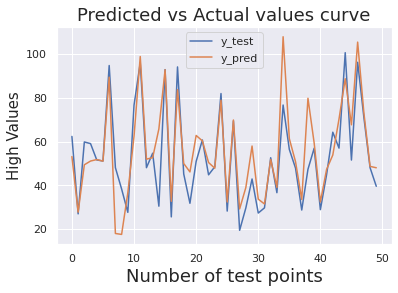

In [ ]:
plt.plot(y_test,label='y_test')
plt.plot(y_pred,label='y_pred')
plt.title('Predicted vs Actual values curve',fontsize='18')
plt.legend()
plt.xlabel('Number of test points',fontsize='18')
plt.ylabel('High Values',fontsize='15')
plt.show()